In [1]:
# Import libraries and set desired options
import pickle
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Read the training and test data sets, change paths if needed
times = ['time%s' % i for i in range(1, 11)]
train_df = pd.read_csv('../../../data/train_sessions.csv',
                       index_col='session_id', parse_dates=times)
test_df = pd.read_csv('../../../data/test_sessions.csv',
                      index_col='session_id', parse_dates=times)

# Sort the data by time
train_df = train_df.sort_values(by='time1')


In [3]:
# Look at the first rows of the training set
train_df.head(500)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,...,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,...,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,...,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0
242171,952,2013-01-12 08:50:22,947.0,2013-01-12 08:50:23,953.0,2013-01-12 08:50:23,946.0,2013-01-12 08:50:23,947.0,2013-01-12 08:50:24,...,2013-01-12 08:50:24,953.0,2013-01-12 08:50:24,955.0,2013-01-12 08:50:24,946.0,2013-01-12 08:50:25,947.0,2013-01-12 08:50:25,0
57157,953,2013-01-12 08:50:25,947.0,2013-01-12 08:50:26,946.0,2013-01-12 08:50:26,953.0,2013-01-12 08:50:26,955.0,2013-01-12 08:50:26,...,2013-01-12 08:50:27,953.0,2013-01-12 08:50:27,946.0,2013-01-12 08:50:27,953.0,2013-01-12 08:50:28,1033.0,2013-01-12 08:50:28,0
240201,946,2013-01-12 08:50:28,947.0,2013-01-12 08:50:28,954.0,2013-01-12 08:50:28,953.0,2013-01-12 08:50:29,946.0,2013-01-12 08:50:29,...,2013-01-12 08:50:29,946.0,2013-01-12 08:50:30,956.0,2013-01-12 08:50:30,957.0,2013-01-12 08:50:31,956.0,2013-01-12 08:50:31,0
210686,946,2013-01-12 08:50:31,956.0,2013-01-12 08:50:32,946.0,2013-01-12 08:50:32,946.0,2013-01-12 08:50:33,955.0,2013-01-12 08:50:33,...,2013-01-12 08:50:33,946.0,2013-01-12 08:50:34,946.0,2013-01-12 08:50:35,946.0,2013-01-12 08:50:36,948.0,2013-01-12 08:50:36,0


In [4]:
train_df[train_df['target'] == 1].head(5)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
251175,270,2013-02-12 16:25:10,270.0,2013-02-12 16:25:11,270.0,2013-02-12 16:32:10,21.0,2013-02-12 16:32:11,21.0,2013-02-12 16:32:24,...,2013-02-12 16:32:25,21.0,2013-02-12 16:32:25,7832.0,2013-02-12 16:32:26,30.0,2013-02-12 16:32:27,7832.0,2013-02-12 16:32:27,1
196388,29,2013-02-12 16:32:27,7832.0,2013-02-12 16:32:28,37.0,2013-02-12 16:32:29,7832.0,2013-02-12 16:32:34,7832.0,2013-02-12 16:32:35,...,2013-02-12 16:32:35,7832.0,2013-02-12 16:32:42,29.0,2013-02-12 16:32:42,7832.0,2013-02-12 16:32:51,7832.0,2013-02-12 16:32:53,1
172448,29,2013-02-12 16:32:53,7832.0,2013-02-12 16:33:11,7832.0,2013-02-12 16:33:12,29.0,2013-02-12 16:33:13,37.0,2013-02-12 16:33:15,...,2013-02-12 16:33:24,29.0,2013-02-12 16:33:24,7832.0,2013-02-12 16:33:33,29.0,2013-02-12 16:33:34,270.0,2013-02-12 16:33:46,1
70129,167,2013-02-12 16:33:50,167.0,2013-02-12 16:33:51,1515.0,2013-02-12 16:33:52,167.0,2013-02-12 16:33:52,37.0,2013-02-12 16:33:52,...,2013-02-12 16:33:52,855.0,2013-02-12 16:33:52,1515.0,2013-02-12 16:33:53,855.0,2013-02-12 16:33:53,1514.0,2013-02-12 16:33:53,1
206254,1520,2013-02-12 16:33:55,1522.0,2013-02-12 16:33:56,1522.0,2013-02-12 16:34:01,1515.0,2013-02-12 16:34:12,1515.0,2013-02-12 16:34:13,...,2013-02-12 16:34:24,1514.0,2013-02-12 16:34:24,1515.0,2013-02-12 16:34:24,1520.0,2013-02-12 16:34:25,1521.0,2013-02-12 16:34:25,1


In [5]:
len(train_df[train_df['target'] == 1])

2297

In [6]:
train_df[train_df['target'] == 1]['site1'].value_counts().head()

80    142
77    141
76    130
29     98
21     80
Name: site1, dtype: int64

In [7]:
train_df[(train_df['target'] == 1) & (pd.isnull(train_df['site10']) )].head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
98482,27168,2013-02-12 16:54:01,12619.0,2013-02-12 16:54:01,3000.0,2013-02-12 16:54:04,3000.0,2013-02-12 16:54:09,3000.0,2013-02-12 16:59:04,...,2013-02-12 17:20:38,21.0,2013-02-12 17:22:37,NaN,NaT,NaN,NaT,NaN,NaT,1
180193,29,2013-02-12 17:54:06,27168.0,2013-02-12 17:54:07,12619.0,2013-02-12 17:54:07,3000.0,2013-02-12 17:54:11,3000.0,2013-02-12 17:54:17,...,2013-02-12 17:59:11,270.0,2013-02-12 18:18:57,270.0,2013-02-12 18:18:58,270.0,2013-02-12 18:18:59,NaN,NaT,1
197753,775,2013-04-12 09:26:15,616.0,2013-04-12 09:26:16,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,1
161160,52,2013-09-12 18:20:54,1057.0,2013-09-12 18:20:54,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,1
221328,3240,2013-11-15 14:04:08,37.0,2013-11-15 14:04:08,220.0,2013-11-15 14:04:08,29.0,2013-11-15 14:04:10,533.0,2013-11-15 14:04:16,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,1


In [8]:
len(train_df[(train_df['target'] == 1) & (pd.isnull(train_df['site10']))])

39

In [9]:
len(train_df[(train_df['target'] == 0) & (pd.isnull(train_df['site10']))])

22470

In [10]:
len(train_df)

253561

#### Day of week

In [11]:
train_df_copy = train_df.copy()
train_df_copy['day_of_week'] = train_df['time1'].apply(lambda ts: ts.dayofweek).astype('category')
#train_df_copy.head()

Alice by day of week

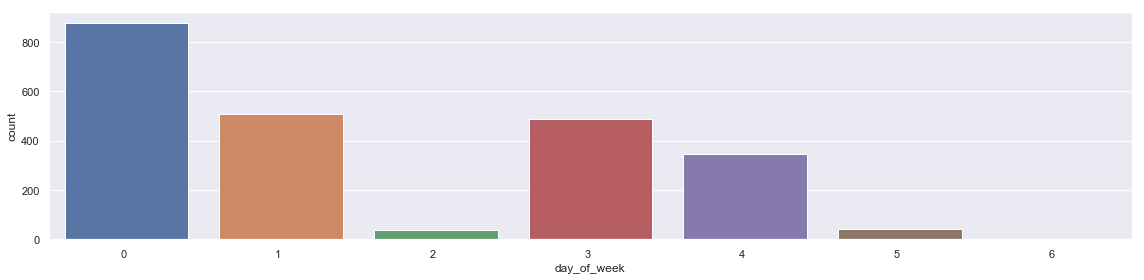

In [12]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x='day_of_week', data=train_df_copy[train_df_copy['target'] == 1]);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.tight_layout()
plt.show()

Not alice by day of week

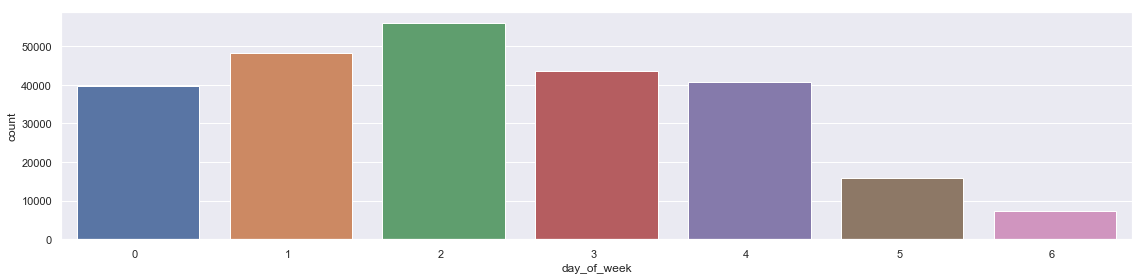

In [13]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x='day_of_week', data=train_df_copy[train_df_copy['target'] == 0]);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.tight_layout()
plt.show()

#### Sites alice visits often

In [14]:
sites = ['site%s' % i for i in range(1, 11)]
train_df[sites] = train_df[sites].fillna(0).astype(np.uint16)
test_df[sites] = test_df[sites].fillna(0).astype(np.uint16)

# Load websites dictionary
with open(r"../../../data/site_dic.pkl", "rb") as input_file:
    site_dict = pickle.load(input_file)

# Create dataframe for the dictionary
sites_dict = pd.DataFrame(list(site_dict.keys()), index=list(site_dict.values()), 
                          columns=['site'])
print(u'Websites total:', sites_dict.shape[0])
sites_dict.head()

Websites total: 48371


,site
25075,www.abmecatronique.com
13997,groups.live.com
42436,majeureliguefootball.wordpress.com
30911,cdt46.media.tourinsoft.eu
8104,www.hdwallpapers.eu


In [15]:
# Top websites in the training data set
top_sites = pd.Series(train_df[sites].values.flatten()
                     ).value_counts().sort_values(ascending=False).head(5)
print(top_sites)
sites_dict.loc[top_sites.drop(0).index]

21     123776
0      122730
23      87619
782     77055
22      58258
dtype: int64


,site
21,www.google.fr
23,www.google.com
782,annotathon.org
22,apis.google.com


In [27]:
# Top of all sites Alice visits
alice_sites = train_df[train_df['target'] == 1]
top_alice_sites = pd.Series(alice_sites.values.flatten()
                           ).value_counts().sort_values(ascending=False).head(400)
print(top_alice_sites)
sites_dict.loc[top_alice_sites.index]
#sites_dict.loc[top_alice_sites.drop(0).index]

1                      2309
77                     1382
80                     1354
76                     1307
29                      897
21                      857
81                      609
22                      522
879                     522
75                      451
82                      447
23                      437
35                      381
881                     371
37                      293
33                      291
3000                    286
733                     274
30                      272
78                      236
941                     215
7832                    209
52                      206
704                     204
0                       201
2078                    188
617                     159
1057                    155
942                     153
270                     151
                       ... 
2014-03-24 16:51:50       8
3848                      8
2014-03-24 16:50:44       8
2014-02-17 18:08:06       8
551                 

/Users/wtf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


,site
1,fpdownload2.macromedia.com
77,i1.ytimg.com
80,s.youtube.com
76,www.youtube.com
29,www.facebook.com
21,www.google.fr
81,r4---sn-gxo5uxg-jqbe.googlevideo.com
22,apis.google.com
879,r1---sn-gxo5uxg-jqbe.googlevideo.com
75,s.ytimg.com


In [28]:
# Top first site alice visits
alice_first_site = train_df[train_df['target'] == 1]['site1']
top_alice_first_site = pd.Series(alice_first_site.values.flatten()
                           ).value_counts().sort_values(ascending=False).head(200)
print(top_alice_first_site)
sites_dict.loc[top_alice_first_site.index]

80       142
77       141
76       130
29        98
21        80
22        56
81        54
23        51
879       47
82        43
881       40
75        35
35        32
37        31
30        30
33        30
3000      28
941       27
733       25
78        25
2078      21
52        20
855       19
270       18
229       17
942       16
1057      16
335       16
1514      16
39        16
        ... 
140        2
13545      2
510        2
2631       2
27311      2
1462       2
700        2
1456       2
5442       2
117        2
678        2
1440       2
890        2
355        2
27241      2
4369       2
291        2
1262       2
107        2
27289      2
3111       2
14240      2
27196      2
27358      2
27184      2
6999       2
533        2
661        2
27277      2
27279      2
Length: 200, dtype: int64


,site
80,s.youtube.com
77,i1.ytimg.com
76,www.youtube.com
29,www.facebook.com
21,www.google.fr
22,apis.google.com
81,r4---sn-gxo5uxg-jqbe.googlevideo.com
23,www.google.com
879,r1---sn-gxo5uxg-jqbe.googlevideo.com
82,r2---sn-gxo5uxg-jqbe.googlevideo.com


In [18]:
top_alice_first_site.index.values

array([   80,    77,    76,    29,    21,    22,    81,    23,   879,
          82,   881,    75,    35,    37,    30,    33,  3000,   941,
         733,    78,  2078,    52,   855,   270,   229,   942,  1057,
         335,  1514,    39,  7832,   704,  3559,   617,     3, 12619,
         265,    38,  2080,    14,  1307,  2077,  1515, 27307,    99,
        1519,   616,  3560,     1,  4694], dtype=uint64)

In [19]:
# Top of last site alice visits
alice_last_site = train_df[train_df['target'] == 1]['site10']
top_alice_last_site = pd.Series(alice_last_site.values.flatten()
                           ).value_counts().sort_values(ascending=False).head(10)
print(top_alice_last_site)
sites_dict.loc[top_alice_last_site.index]

77     149
76     138
80     136
21      89
29      84
81      61
22      56
879     55
75      45
23      44
dtype: int64


,site
77,i1.ytimg.com
76,www.youtube.com
80,s.youtube.com
21,www.google.fr
29,www.facebook.com
81,r4---sn-gxo5uxg-jqbe.googlevideo.com
22,apis.google.com
879,r1---sn-gxo5uxg-jqbe.googlevideo.com
75,s.ytimg.com
23,www.google.com


In [20]:
not_alice_sites = train_df[train_df['target'] == 0]
top_not_alice_sites = pd.Series(not_alice_sites.values.flatten()
                           ).value_counts().sort_values(ascending=False).head(10)

In [21]:
#print(top_not_alice_sites)
sites_dict.loc[top_not_alice_sites.drop(0).index]

,site
21,www.google.fr
23,www.google.com
782,annotathon.org
22,apis.google.com
29,www.facebook.com
167,www.bing.com
780,blast.ncbi.nlm.nih.gov
778,www.ncbi.nlm.nih.gov
52,clients1.google.com


In [22]:
# Top first site NOT alice visits
not_alice_first_site = train_df[train_df['target'] == 0]['site1']
top_not_alice_first_site = pd.Series(not_alice_first_site.values.flatten()
                           ).value_counts().sort_values(ascending=False).head(40)
print(top_not_alice_first_site)
sites_dict.loc[top_not_alice_first_site.index]

21     13794
23      9193
782     7769
29      5403
22      5378
167     5083
780     4407
778     3790
52      3761
812     3515
570     3285
80      3000
55      2962
39      2431
37      2298
786     2298
30      2298
35      2247
56      2127
33      1960
76      1929
3       1755
616     1754
270     1752
820     1662
77      1629
784     1602
677     1600
733     1580
1       1400
229     1371
63      1308
38      1290
941     1174
222     1163
175     1155
66      1146
177     1084
953     1026
942     1015
dtype: int64


,site
21,www.google.fr
23,www.google.com
782,annotathon.org
29,www.facebook.com
22,apis.google.com
167,www.bing.com
780,blast.ncbi.nlm.nih.gov
778,www.ncbi.nlm.nih.gov
52,clients1.google.com
812,mail.google.com


In [23]:
# Top last site NOT alice visits
not_alice_last_site = train_df[train_df['target'] == 0]['site10']
top_not_alice_last_site = pd.Series(not_alice_last_site.values.flatten()
                           ).value_counts().sort_values(ascending=False).head(10)
print(top_not_alice_last_site)
sites_dict.loc[top_not_alice_last_site.drop(0).index]

0      22470
21     11144
23      7939
782     7663
22      5435
29      5225
780     4388
167     4142
778     3769
812     3337
dtype: int64


,site
21,www.google.fr
23,www.google.com
782,annotathon.org
22,apis.google.com
29,www.facebook.com
780,blast.ncbi.nlm.nih.gov
167,www.bing.com
778,www.ncbi.nlm.nih.gov
812,mail.google.com
